In [1]:
import pandas as pd
try:
    df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'WA_Fn-UseC_-Telco-Customer-Churn.csv' not found. Make sure the CSV file is in the same directory as your notebook.")
print("\nFirst 5 rows of the dataset:")
df.head()

Dataset loaded successfully!

First 5 rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
print("DataFrame Info:")
df.info()
print("\nDescriptive Statistics for Numrical Columns:")
display(df.describe())
print("\nNumber of Unique Values per Columnn:")
display(df.nunique())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



Number of Unique Values per Columnn:


customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


Churn Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


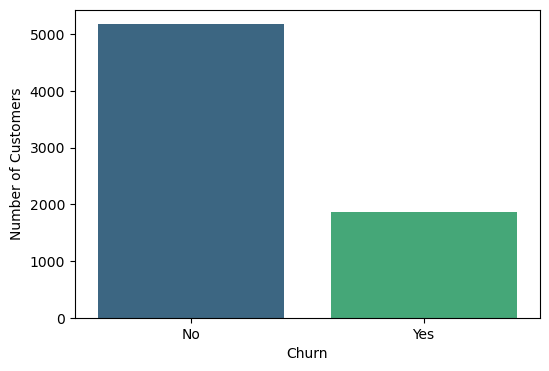

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
churn_counts = df['Churn'].value_counts()
print("\nChurn Distribution:")
print(churn_counts)

plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', hue='Churn', data=df, palette='viridis', legend=False)
plt.ylabel('Number of Customers')
plt.show()

In [4]:
print("\nMissing Valuees per column:")
df.isnull().sum()


Missing Valuees per column:


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print("\nMissing values after converting TotalCharges:")
print(df.isnull().sum())

df.dropna(inplace=True)

print("\nDataFrame shape after dropping rows with missing values:")
print(df.shape)


Missing values after converting TotalCharges:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

DataFrame shape after dropping rows with missing values:
(7032, 21)


In [6]:
# --- Full Data Preparation ---

# 1. Handle 'TotalCharges' and drop rows with any missing values
print("Step 1: Cleaning 'TotalCharges' and handling missing values...")
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# 2. Drop the unnecessary customerID column
print("Step 2: Dropping 'customerID' column...")
df = df.drop('customerID', axis=1)

# 3. Encode ALL categorical variables into numbers
print("Step 3: Encoding categorical variables...")
# First, manually map the target variable 'Churn'
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
# Automatically find and one-hot encode all remaining text columns
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 4. Clean up column names to prevent future warnings
print("Step 4: Cleaning column names...")
df.columns = [col.replace(' ', '_').replace('(', '').replace(')', '').replace('-', '_') for col in df.columns]

# 5. Convert boolean columns (from get_dummies) to integers (0s and 1s)
print("Step 5: Converting boolean columns to integers for SHAP compatibility...")
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

# 6. Scale the numerical features
print("Step 6: Scaling numerical features...")
from sklearn.preprocessing import StandardScaler
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\n--- Full Data Preparation Complete ---")
print("All data is now clean, fully numeric, scaled, and has clean column names.")

# Final verification of data types
print("\nFinal Data Types:")
df.info()

Step 1: Cleaning 'TotalCharges' and handling missing values...
Step 2: Dropping 'customerID' column...
Step 3: Encoding categorical variables...
Step 4: Cleaning column names...
Step 5: Converting boolean columns to integers for SHAP compatibility...
Step 6: Scaling numerical features...

--- Full Data Preparation Complete ---
All data is now clean, fully numeric, scaled, and has clean column names.

Final Data Types:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeniorCitizen                         7032 non-null   int64  
 1   tenure                                7032 non-null   float64
 2   MonthlyCharges                        7032 non-null   float64
 3   TotalCharges                          7032 non-null   float64
 4   Churn                                 7032 non-null   int64  
 5   ge

In [7]:
from sklearn.preprocessing import StandardScaler
numerical_cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
scaler=StandardScaler()
df[numerical_cols_to_scale] = scaler.fit_transform(df[numerical_cols_to_scale])
print("\nDataFrame after scaling numerical features:")
df.head()


DataFrame after scaling numerical features:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No_phone_service,...,StreamingTV_No_internet_service,StreamingTV_Yes,StreamingMovies_No_internet_service,StreamingMovies_Yes,Contract_One_year,Contract_Two_year,PaperlessBilling_Yes,PaymentMethod_Credit_card_automatic,PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
0,0,-1.280248,-1.161694,-0.994194,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,0.064303,-0.260878,-0.173740,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,-1.239504,-0.363923,-0.959649,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0.512486,-0.747850,-0.195248,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,-1.239504,0.196178,-0.940457,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)
print("Data split into training and testing sets.")

Data split into training and testing sets.


In [10]:
from imblearn.over_sampling import SMOTE

# --- Check the class distribution before SMOTE ---
print("--- Balancing the Training Data with SMOTE ---")
print("Distribution Before SMOTE:")
print(y_train.value_counts())

# --- Apply SMOTE ---
# This creates new synthetic samples for the minority class (Churn=1)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# --- Check the class distribution after SMOTE ---
print("\nDistribution After SMOTE:")
print(y_train_smote.value_counts())

--- Balancing the Training Data with SMOTE ---
Distribution Before SMOTE:
Churn
0    3614
1    1308
Name: count, dtype: int64

Distribution After SMOTE:
Churn
1    3614
0    3614
Name: count, dtype: int64


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
log_reg=LogisticRegression(random_state=42,solver='liblinear')
rf_clf=RandomForestClassifier(random_state=42,n_estimators=100)
xgb_clf=XGBClassifier(random_state=42,eval_metric='logloss')
models={    "Logistic Regression": log_reg,
    "Random Forest": rf_clf,
    "XGBoost": xgb_clf
}
#Training and Cross-validation
print("\n--- Model Training and Cross-Validation ---")
results = {}
for name,model in models.items():
    #1train the model
    model.fit(X_train,y_train)
    #perform crossvalidation
    cv_scores=cross_val_score(model,X_train,y_train,cv=5,scoring='roc_auc')
    results[name]={
            "Model": model,
        "CV_Mean_ROC_AUC": cv_scores.mean(),
        "CV_Std_ROC_AUC": cv_scores.std()
    }
    print(f"{name} -CV ROC-AUC:{cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
    

/home/youssef/anaconda3/lib/python3.13/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(



--- Model Training and Cross-Validation ---
Logistic Regression -CV ROC-AUC:0.8481 (+/- 0.0151)
Random Forest -CV ROC-AUC:0.8298 (+/- 0.0137)
XGBoost -CV ROC-AUC:0.8238 (+/- 0.0183)


In [12]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
print("\n--- Hyperparameter Tuning (Randomized Search for XGBoost) ---")
param_dist={ 
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4),
     'colsample_bytree': uniform(0.6, 0.4)
}
random_search=RandomizedSearchCV(
    estimator=XGBClassifier(random_state=42,eval_metric='logloss'),
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train,y_train)
best_xgb_clf = random_search.best_estimator_
best_score=random_search.best_score_
print(f"\nBest XGBoost Model ROC-AUC Score (from CV): {best_score:.4f}")
print(f"Best Parameters: {random_search.best_params_}")


--- Hyperparameter Tuning (Randomized Search for XGBoost) ---
Fitting 5 folds for each of 50 candidates, totalling 250 fits


/home/youssef/anaconda3/lib/python3.13/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
/home/youssef/anaconda3/lib/python3.13/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. C


Best XGBoost Model ROC-AUC Score (from CV): 0.8041
Best Parameters: {'colsample_bytree': np.float64(0.871025744736913), 'learning_rate': np.float64(0.014976348678356847), 'max_depth': 5, 'n_estimators': 246, 'subsample': np.float64(0.7394663949166917)}



--- Training model on balanced data... ---
Training complete.

--- Final Model Evaluation (After SMOTE) ---
ROC-AUC Score: 0.8308

New Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1549
           1       0.52      0.76      0.62       561

    accuracy                           0.75      2110
   macro avg       0.71      0.75      0.71      2110
weighted avg       0.80      0.75      0.76      2110

New Confusion Matrix:


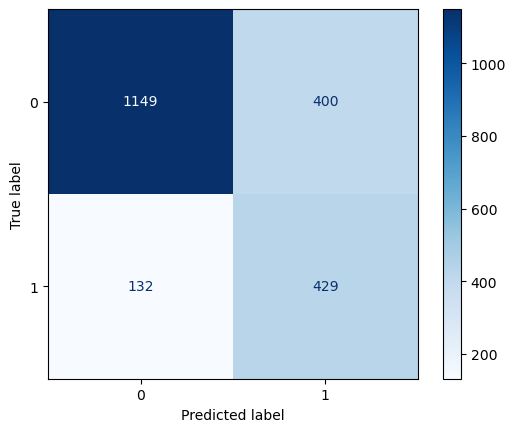

In [13]:
# Import the necessary libraries
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize the same best model you had before
best_params = {
    'colsample_bytree': 0.871, 'learning_rate': 0.015, 'max_depth': 5,
    'n_estimators': 246, 'subsample': 0.739
}
xgb_smote = XGBClassifier(random_state=42, eval_metric='logloss', **best_params)

# --- TRAIN on the BALANCED (SMOTE) data ---
print("\n--- Training model on balanced data... ---")
xgb_smote.fit(X_train_smote, y_train_smote)
print("Training complete.")

# --- EVALUATE on the ORIGINAL, UNSEEN test data ---
print("\n--- Final Model Evaluation (After SMOTE) ---")
y_pred_smote = xgb_smote.predict(X_test)
y_pred_proba_smote = xgb_smote.predict_proba(X_test)[:, 1]

# Print the new evaluation metrics
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_smote):.4f}\n")
print("New Classification Report:")
print(classification_report(y_test, y_pred_smote))

print("New Confusion Matrix:")
ConfusionMatrixDisplay.from_estimator(xgb_smote, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

--- Evaluating with a Manual Threshold of 0.63 ---

New Classification Report (Higher Precision):
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1549
           1       0.59      0.63      0.61       561

    accuracy                           0.78      2110
   macro avg       0.72      0.74      0.73      2110
weighted avg       0.79      0.78      0.79      2110

New Confusion Matrix (Higher Precision):


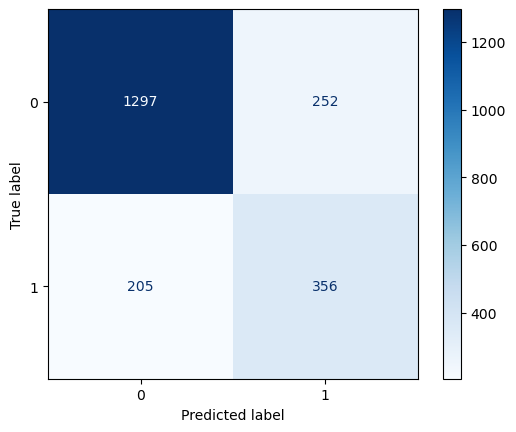

In [14]:
import numpy as np
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get the prediction probabilities from your SMOTE-trained model
# This should be the same 'xgb_smote' model from your previous step
y_pred_proba_smote = xgb_smote.predict_proba(X_test)[:, 1]

# --- Experiment with a HIGHER threshold to boost precision ---
# Let's start with a threshold of 0.65 (i.e., 65% confidence)
# You can change this value to 0.70, 0.75, etc., to see the effect.
manual_threshold = 0.63

print(f"--- Evaluating with a Manual Threshold of {manual_threshold} ---")

# Apply the new, higher threshold to get new predictions
y_pred_manual = (y_pred_proba_smote >= manual_threshold).astype(int)

# --- Print the new classification report ---
print("\nNew Classification Report (Higher Precision):")
print(classification_report(y_test, y_pred_manual))

# --- Display the new confusion matrix ---
print("New Confusion Matrix (Higher Precision):")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_manual, cmap=plt.cm.Blues)
plt.show()


In [15]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score

# --- Experiment 1: Train and Evaluate LightGBM ---

print("--- Training LightGBM Model on SMOTE data ---")
# We can use some good default parameters to start
lgbm_model = LGBMClassifier(random_state=42)

# Train on the balanced (SMOTE) data
lgbm_model.fit(X_train_smote, y_train_smote)

# Evaluate on the original, unseen test data
y_pred_lgbm = lgbm_model.predict(X_test)
y_pred_proba_lgbm = lgbm_model.predict_proba(X_test)[:, 1]

print("\n--- LightGBM Model Evaluation ---")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_lgbm):.4f}\n")
print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgbm))


# --- Experiment 2: Train and Evaluate CatBoost ---

print("\n\n--- Training CatBoost Model on SMOTE data ---")
# CatBoost can be a bit verbose, so we'll set verbose=0 to keep the output clean
cat_model = CatBoostClassifier(random_state=42, verbose=0)

# Train on the balanced (SMOTE) data
cat_model.fit(X_train_smote, y_train_smote)

# Evaluate on the original, unseen test data
y_pred_cat = cat_model.predict(X_test)
y_pred_proba_cat = cat_model.predict_proba(X_test)[:, 1]

print("\n--- CatBoost Model Evaluation ---")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_cat):.4f}\n")
print("CatBoost Classification Report:")
print(classification_report(y_test, y_pred_cat))

--- Training LightGBM Model on SMOTE data ---
[LightGBM] [Info] Number of positive: 3614, number of negative: 3614
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 819
[LightGBM] [Info] Number of data points in the train set: 7228, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

--- LightGBM Model Evaluation ---
ROC-AUC Score: 0.8206

LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1549
           1       0.55      0.70      0.61       561

    accuracy                           0.77      2110
   macro avg       0.71      0.74      0.72      2110
weighted avg       0.79      0.77      0.77      2110



--- Training CatBoost Model on SMOTE

In [16]:
# --- DATA TYPE DIAGNOSIS & FIX CELL ---
print("--- Running Diagnosis on X_train before SHAP ---")

# Find any columns that are NOT numbers (int, float, bool)
non_numeric_cols = X_train.select_dtypes(exclude=np.number).columns

if len(non_numeric_cols) == 0:
    print("\nSUCCESS: Your X_train DataFrame is fully numeric and ready for SHAP.")
else:
    print("\nPROBLEM FOUND: The following columns in X_train are not numbers:")
    print(list(non_numeric_cols))
    print("\nThis is the cause of the error. It means your data preparation steps are in the wrong order.")
    print("All encoding (like pd.get_dummies) must happen BEFORE the train_test_split.")

# For extra detail, let's print the data types
print("\nFull data types of X_train:")
X_train.info()

--- Running Diagnosis on X_train before SHAP ---

SUCCESS: Your X_train DataFrame is fully numeric and ready for SHAP.

Full data types of X_train:
<class 'pandas.core.frame.DataFrame'>
Index: 4922 entries, 4499 to 272
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeniorCitizen                         4922 non-null   int64  
 1   tenure                                4922 non-null   float64
 2   MonthlyCharges                        4922 non-null   float64
 3   TotalCharges                          4922 non-null   float64
 4   gender_Male                           4922 non-null   int64  
 5   Partner_Yes                           4922 non-null   int64  
 6   Dependents_Yes                        4922 non-null   int64  
 7   PhoneService_Yes                      4922 non-null   int64  
 8   MultipleLines_No_phone_service        4922 non-null   int64  
 9   Multip

Calculating SHAP values... (This may take a moment)


 94%|=================== | 1982/2110 [00:16<00:01]       

Calculation complete.

--- Global Feature Importance (Top 10) ---


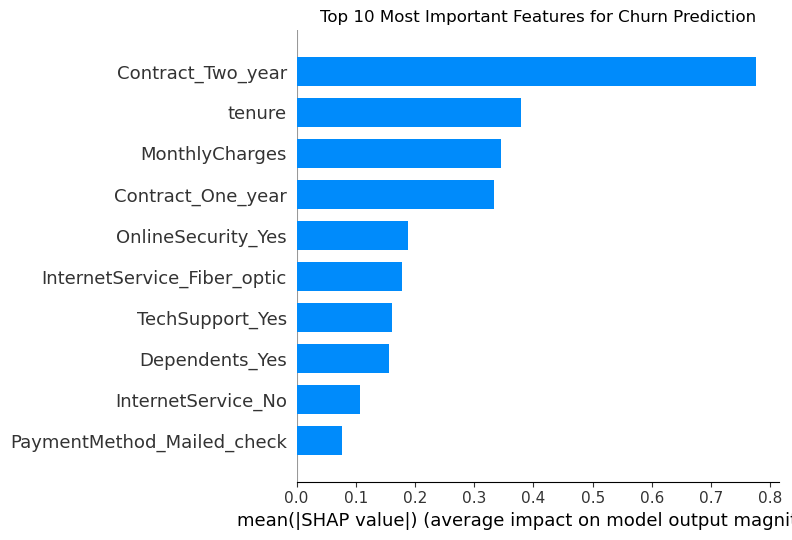


--- Detailed Feature Impact on Churn Prediction ---


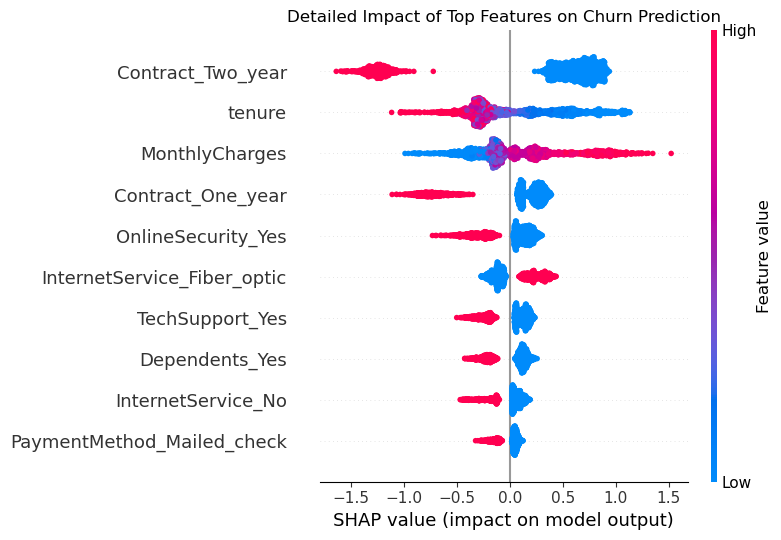

In [17]:
import shap
import matplotlib.pyplot as plt

# --- Step 1: Create the SHAP Explainer ---
# We use your single best-trained model: xgb_smote
# (This is the model that powers both your high-recall and high-precision scenarios)
explainer = shap.Explainer(xgb_smote, X_train)

# --- Step 2: Calculate SHAP values for the test set ---
# This explains how the model generated the probabilities for the test set customers.
print("Calculating SHAP values... (This may take a moment)")
shap_values = explainer(X_test)
print("Calculation complete.")


# --- Step 3: Global Feature Importance (Bar Plot) ---
# This shows which features have the biggest impact on the probability scores overall.
print("\n--- Global Feature Importance (Top 10) ---")
plt.title("Top 10 Most Important Features for Churn Prediction")
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=10)


# --- Step 4: Detailed Feature Impact (Beeswarm Plot) ---
# This shows how high or low values of a feature impact the probability scores.
print("\n--- Detailed Feature Impact on Churn Prediction ---")
plt.title("Detailed Impact of Top Features on Churn Prediction")
shap.summary_plot(shap_values, X_test, max_display=10)

In [18]:
# --- Step 7.1: Prepare Data for Power BI Dashboard ---

print("--- Preparing data for reporting ---")

# 1. Reload the original, unprocessed data to get the human-readable text columns.
df_original = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 2. Perform only the most essential cleaning on this data.
df_original['TotalCharges'] = pd.to_numeric(df_original['TotalCharges'], errors='coerce')
df_original.dropna(inplace=True)

# 3. Filter this original data to include ONLY the customers in your test set.
# We use the index of X_test to ensure a perfect match.
report_df = df_original.loc[X_test.index].copy() # Use .copy() to avoid warnings

# 4. Add the powerful predictions from your champion model (xgb_smote).
# We align the indexes to make sure the predictions match the right customers.
report_df['Actual_Churn'] = y_test
report_df['Churn_Probability'] = xgb_smote.predict_proba(X_test)[:, 1]
report_df['Predicted_Churn'] = xgb_smote.predict(X_test)

# 5. Save the result to a new CSV file. This is your dashboard's data source.
report_df.to_csv('churn_dashboard_data.csv', index=False) # index=False is crucial for Power BI

print("\n'churn_dashboard_data.csv' has been created successfully!")
print("This file contains the original customer data enriched with your model's predictions.")
display(report_df.head())

--- Preparing data for reporting ---

'churn_dashboard_data.csv' has been created successfully!
This file contains the original customer data enriched with your model's predictions.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Actual_Churn,Churn_Probability,Predicted_Churn
4221,7926-IJOOU,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,Month-to-month,No,Credit card (automatic),19.30,19.30,No,0,0.220643,0
1820,7554-AKDQF,Female,0,Yes,No,6,Yes,No,DSL,No,...,No,Month-to-month,No,Mailed check,45.65,323.45,No,0,0.680175,1
2375,0013-SMEOE,Female,1,Yes,No,71,Yes,No,Fiber optic,Yes,...,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25,No,0,0.056191,0
5462,9289-LBQVU,Male,0,Yes,No,64,Yes,Yes,DSL,No,...,Yes,One year,Yes,Mailed check,70.15,4480.70,No,0,0.101519,0
1791,2348-KCJLT,Female,0,Yes,No,44,Yes,No,DSL,Yes,...,No,One year,Yes,Mailed check,61.50,2722.20,No,0,0.071674,0


In [19]:
# --- Step 7.1: Prepare Data for Reporting ---

print("--- Preparing data for visualization ---")

# 1. Reload the original data to get human-readable text columns.
df_original = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 2. Perform essential cleaning.
df_original['TotalCharges'] = pd.to_numeric(df_original['TotalCharges'], errors='coerce')
df_original.dropna(inplace=True)

# 3. Filter this data to match ONLY the customers in your test set.
report_df = df_original.loc[X_test.index].copy()

# 4. Add the predictions from your champion model (xgb_smote).
report_df['Actual_Churn'] = y_test
report_df['Churn_Probability'] = xgb_smote.predict_proba(X_test)[:, 1]
report_df['Predicted_Churn'] = xgb_smote.predict(X_test)

print("\nReporting DataFrame is ready.")
display(report_df.head())

--- Preparing data for visualization ---

Reporting DataFrame is ready.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Actual_Churn,Churn_Probability,Predicted_Churn
4221,7926-IJOOU,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,Month-to-month,No,Credit card (automatic),19.30,19.30,No,0,0.220643,0
1820,7554-AKDQF,Female,0,Yes,No,6,Yes,No,DSL,No,...,No,Month-to-month,No,Mailed check,45.65,323.45,No,0,0.680175,1
2375,0013-SMEOE,Female,1,Yes,No,71,Yes,No,Fiber optic,Yes,...,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25,No,0,0.056191,0
5462,9289-LBQVU,Male,0,Yes,No,64,Yes,Yes,DSL,No,...,Yes,One year,Yes,Mailed check,70.15,4480.70,No,0,0.101519,0
1791,2348-KCJLT,Female,0,Yes,No,44,Yes,No,DSL,Yes,...,No,One year,Yes,Mailed check,61.50,2722.20,No,0,0.071674,0


In [20]:
# --- Step 7.1: Prepare Data for Reporting ---

print("--- Preparing data for visualization ---")

# 1. Reload the original data to get human-readable text columns.
df_original = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 2. Perform essential cleaning.
df_original['TotalCharges'] = pd.to_numeric(df_original['TotalCharges'], errors='coerce')
df_original.dropna(inplace=True)

# 3. Filter this data to match ONLY the customers in your test set.
report_df = df_original.loc[X_test.index].copy()

# 4. Add the predictions from your champion model (xgb_smote).
report_df['Actual_Churn'] = y_test
report_df['Churn_Probability'] = xgb_smote.predict_proba(X_test)[:, 1]
report_df['Predicted_Churn'] = xgb_smote.predict(X_test)

print("\nReporting DataFrame is ready.")
display(report_df.head())

--- Preparing data for visualization ---

Reporting DataFrame is ready.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Actual_Churn,Churn_Probability,Predicted_Churn
4221,7926-IJOOU,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,Month-to-month,No,Credit card (automatic),19.30,19.30,No,0,0.220643,0
1820,7554-AKDQF,Female,0,Yes,No,6,Yes,No,DSL,No,...,No,Month-to-month,No,Mailed check,45.65,323.45,No,0,0.680175,1
2375,0013-SMEOE,Female,1,Yes,No,71,Yes,No,Fiber optic,Yes,...,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25,No,0,0.056191,0
5462,9289-LBQVU,Male,0,Yes,No,64,Yes,Yes,DSL,No,...,Yes,One year,Yes,Mailed check,70.15,4480.70,No,0,0.101519,0
1791,2348-KCJLT,Female,0,Yes,No,44,Yes,No,DSL,Yes,...,No,One year,Yes,Mailed check,61.50,2722.20,No,0,0.071674,0


/tmp/ipykernel_3213/682091112.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Contract', y='Actual_Churn', data=report_df, palette='viridis')


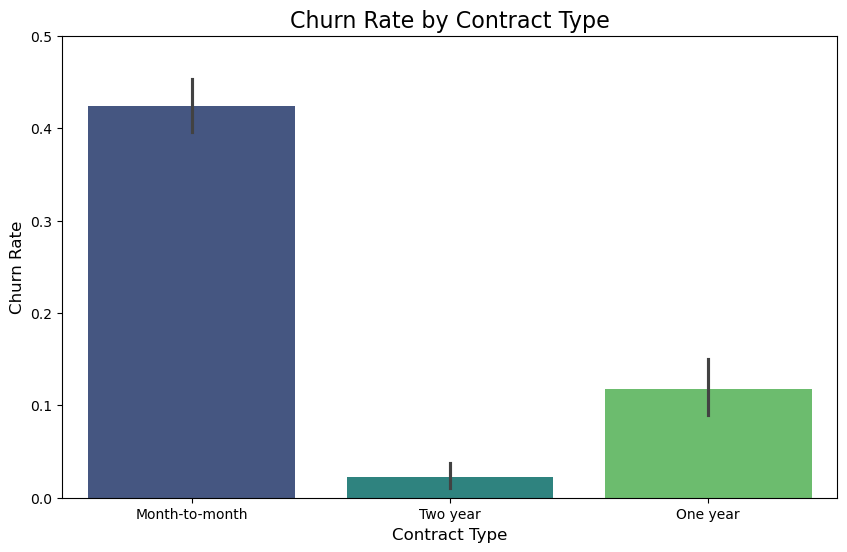

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Contract', y='Actual_Churn', data=report_df, palette='viridis')

plt.title('Churn Rate by Contract Type', fontsize=16)
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.ylim(0, 0.5) # Set y-axis limit to make differences more apparent

plt.show()

/tmp/ipykernel_3213/1140002045.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='InternetService', y='Actual_Churn', data=report_df, palette='plasma')


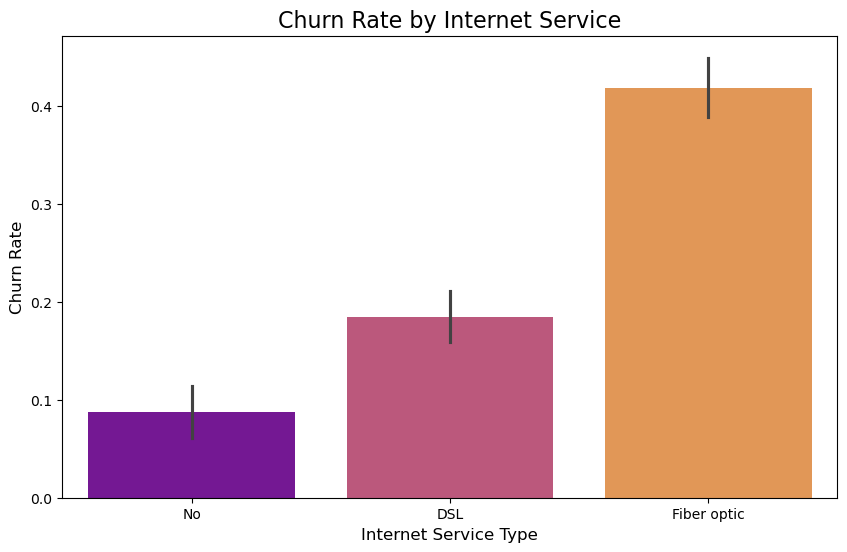

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='InternetService', y='Actual_Churn', data=report_df, palette='plasma')

plt.title('Churn Rate by Internet Service', fontsize=16)
plt.xlabel('Internet Service Type', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)

plt.show()

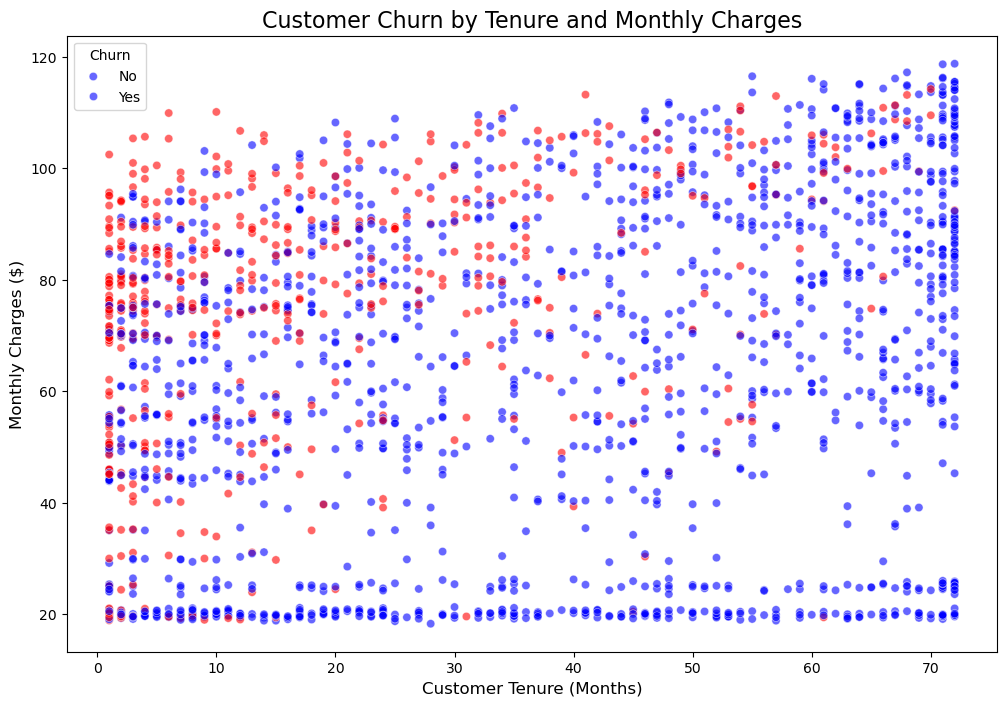

In [23]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Actual_Churn', data=report_df, palette={0: 'blue', 1: 'red'}, alpha=0.6)

plt.title('Customer Churn by Tenure and Monthly Charges', fontsize=16)
plt.xlabel('Customer Tenure (Months)', fontsize=12)
plt.ylabel('Monthly Charges ($)', fontsize=12)
plt.legend(title='Churn', labels=['No', 'Yes'])

plt.show()

In [24]:
# Select the top 10 customers with the highest churn probability
high_risk_customers = report_df.sort_values(by='Churn_Probability', ascending=False).head(10)

# Select and reorder the most important columns for the report
report_table = high_risk_customers[[
    'customerID',
    'Churn_Probability',
    'tenure',
    'Contract',
    'InternetService',
    'MonthlyCharges'
]]

# Display the final table
print("--- Top 10 Most At-Risk Customers ---")
display(report_table)

--- Top 10 Most At-Risk Customers ---


,customerID,Churn_Probability,tenure,Contract,InternetService,MonthlyCharges
3380,5178-LMXOP,0.922866,1,Month-to-month,Fiber optic,95.10
6232,9681-OXGVC,0.919908,5,Month-to-month,Fiber optic,100.50
3727,9057-SIHCH,0.919086,3,Month-to-month,Fiber optic,96.60
1073,0655-RBDUG,0.918778,7,Month-to-month,Fiber optic,98.05
5474,4912-PIGUY,0.918541,1,Month-to-month,Fiber optic,84.60
2631,6861-XWTWQ,0.918123,7,Month-to-month,Fiber optic,99.25
4585,1069-XAIEM,0.917771,1,Month-to-month,Fiber optic,85.05
2464,2609-IAICY,0.916110,1,Month-to-month,Fiber optic,77.15
5783,1415-YFWLT,0.915979,1,Month-to-month,Fiber optic,89.30
3159,5150-ITWWB,0.915678,3,Month-to-month,Fiber optic,94.85


Exception ignored in: <function ResourceTracker.__del__ at 0x715b92d7e840>
Traceback (most recent call last):
  File "/home/youssef/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/home/youssef/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/home/youssef/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x7ceb31d82840>
Traceback (most recent call last):
  File "/home/youssef/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/home/youssef/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/home/youssef/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTrac

In [25]:
import joblib
import shap
import matplotlib.pyplot as plt

# 1. Save your champion XGBoost model (trained on SMOTE data)
joblib.dump(xgb_smote, 'churn_model.pkl')

# 2. Save the data scaler
joblib.dump(scaler, 'scaler.pkl')

# 3. Re-calculate and save the SHAP objects for visualization
print("Calculating and saving SHAP objects...")
explainer = shap.Explainer(xgb_smote, X_train)
shap_values = explainer(X_test)
joblib.dump((explainer, shap_values, X_test), 'shap_objects.pkl')
print("SHAP objects saved.")

# 4. Save the final reporting DataFrame
report_df.to_csv('churn_dashboard_data.csv', index=False)
print("Reporting data saved.")

Calculating and saving SHAP objects...


 98%|===================| 2074/2110 [00:17<00:00]        

SHAP objects saved.
Reporting data saved.
